In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
import ast
df["job_skills"] = df["job_skills"].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df_DA = df[(df["job_title_short"] == "Data Analyst") & (df["job_country"] == "United States")].copy()
df_DA = df_DA.dropna(subset="salary_year_avg")

In [3]:
df_Exploded = df_DA.explode("job_skills")


In [12]:
top_data = df_Exploded.groupby("job_skills")["salary_year_avg"].agg(["count", "median"])


In [17]:
top_paid_skills = top_data.sort_values(by="median", ascending= False).head(10)
top_in_demand_skills = top_data.sort_values(by="count", ascending=False).head(10).sort_values(by="median", ascending= False)

In [18]:
top_paid_skills

,count,median
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [19]:
top_in_demand_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


<Axes: ylabel='job_skills'>

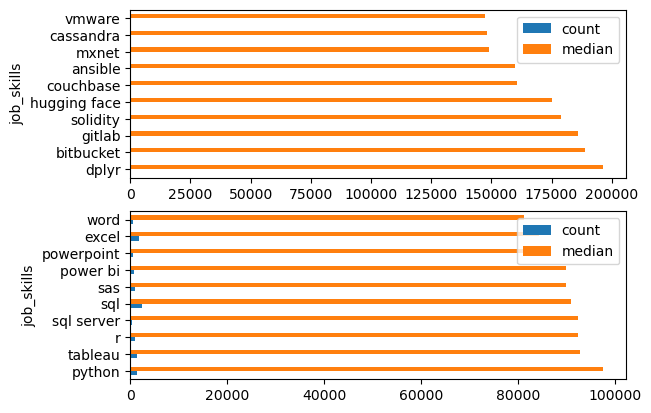

In [20]:
fig, ax = plt.subplots(2,1)
top_paid_skills.plot(kind = "barh", ax=ax[0])
top_in_demand_skills.plot(kind = "barh", ax = ax[1])


                    

In [ ]:
df